## Churn for Bank Customers

#### Tujuan:
- Memprediksi pelanggan yang akan meninggalkan bank (churn).

#### Manfaat Bisnis: 
- Membantu bank memprediksi dan mencegah churn pelanggan, mengoptimalkan kampanye pemasaran, dan mempertahankan klien yang berharga.

#### Tujuan Bisnis

1. Memprediksi pelanggan yang berisiko untuk churn (meninggalkan bank) berdasarkan data historis.
2. Menghitung biaya intervensi dan kerugian (Dapat mengurangi biaya akuisisi pelanggan dan dapat mencegah kerugian)
3. Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap churn, seperti usia, skor kredit, dan lama menjadi pelanggan (tenure).

### Dataset:

1.  Fitur-Fitur:
    -	Detail Pelanggan: Informasi demografi (usia, jenis kelamin, dll.)
    -	Detail Perbankan: Saldo akun, jumlah produk, skor kredit, dll.
    -	Churn: Variabel target (apakah pelanggan churn atau tidak).
2.  Struktur Data:
    -	10.000 data pelanggan.
    -	14 kolom (numerik dan kategorikal).

1.	RowNumber:nomor urut baris yang berfungsi hanya sebagai identifikasi baris dalam dataset dan tidak berpengaruh pada hasil analisis atau prediksi churn.
2.	CustomerId (Numerik): ID unik untuk setiap nasabah. Variabel ini digunakan untuk mengidentifikasi setiap nasabah secara individual di dalam dataset (tidak mempengaruhi keputusan nasabah untuk meninggalkan bank)
3.  Surname: Nama belakang nasabah. Kolom ini tidak memiliki pengaruh terhadap keputusan nasabah untuk meninggalkan bank.
4.	CreditScore (Numerik): Nasabah dengan skor kredit yang lebih tinggi cenderung lebih jarang meninggalkan bank (semakin baik kemampuan nasabah dalam memenuhi kewajiban keuangan mereka seperti membayar utang) dibandingkan nasabah dengan skor kredit rendah . Oleh karena itu, skor kredit bisa menjadi faktor penting dalam memprediksi churn.
5.	Geography (Kategorikal): Lokasi atau negara tempat nasabah berada (misalnya, Prancis, Spanyol, atau Jerman). Variabel ini membantu dalam menganalisis apakah lokasi geografis berhubungan dengan kemungkinan churn.
6.	Gender (Kategorikal): Jenis kelamin nasabah (Pria atau Wanita). Ini bisa memberikan wawasan apakah gender memengaruhi kecenderungan untuk churn.
7.	Age (Numerik): usia dapat mempengaruhi keputusan seseorang dalam tetap berhubungan dengan bank atau memilih layanan bank lain (lebih tua cenderung lebih loyal dan kurang kemungkinan untuk meninggalkan bank dibandingkan dengan nasabah yang lebih muda).
8.	Tenure (Numerik):Lama nasabah menjadi pelanggan bank, diukur dalam tahun. Semakin lama nasabah menjadi pelanggan, biasanya semakin kecil kemungkinan mereka untuk churn.
9.	Balance (Numerik): Saldo rekening nasabah. Nasabah dengan saldo lebih tinggi dalam akun mereka cenderung lebih loyal dan tidak mudah meninggalkan bank dibandingkan dengan nasabah yang memiliki saldo lebih rendah.
10.	NumOfProducts (Numerik): Jumlah produk yang dimiliki nasabah dengan bank (misalnya, rekening tabungan, kartu kredit, pinjaman, dll). Semakin banyak produk yang dimiliki, semakin besar kemungkinan nasabah untuk tetap menjadi pelanggan.
11.	HasCrCard (Biner (0 atau 1)): Menunjukkan apakah nasabah memiliki kartu kredit bank tersebut (1 jika memiliki, 0 jika tidak). Variabel ini penting karena kartu kredit bisa menjadi faktor yang mempengaruhi keputusan nasabah untuk tetap atau meninggalkan bank.
12.	IsActiveMember (Biner (0 atau 1)): Menunjukkan apakah nasabah merupakan anggota aktif di bank (1 jika aktif, 0 jika tidak). Nasabah yang lebih aktif dalam bertransaksi cenderung lebih setia kepada bank mereka.
13.	EstimatedSalary (Numerik): Gaji yang diperkirakan dari nasabah berdasarkan informasi yang tersedia. Nasabah dengan gaji lebih tinggi biasanya lebih stabil secara finansial dan lebih sedikit kemungkinan untuk meninggalkan bank dibandingkan nasabah dengan gaji lebih rendah.
14.	Exited (0 atau 1): Menunjukkan apakah nasabah telah meninggalkan bank atau tidak (1 jika sudah meninggalkan, 0 jika masih bertahan). Variabel ini adalah target atau variabel yang ingin diprediksi dalam model machine learning. Churn (keluar dari bank) adalah indikator utama yang dipelajari dalam dataset ini.

### Import Library

In [146]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load Dataset

In [147]:
# load data
churn_df = pd.read_csv('E:/baru/churn/churn.csv', sep=',')
pd.set_option('display.max_column', None)
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [148]:
# cek info dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Data Pre-processing

Cek Missing Value

In [149]:
# Memeriksa nilai yang hilang
missing_values = churn_df.isnull().sum()
print(f"Nilai yang hilang:\n{missing_values}")

Nilai yang hilang:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Cek Data Unik

In [150]:
# looping untuk cek data unik tiap fitur
for col in churn_df.columns:
    print(f"{col}. Unique Val: {len(churn_df[col].unique())}")

RowNumber. Unique Val: 10000
CustomerId. Unique Val: 10000
Surname. Unique Val: 2932
CreditScore. Unique Val: 460
Geography. Unique Val: 3
Gender. Unique Val: 2
Age. Unique Val: 70
Tenure. Unique Val: 11
Balance. Unique Val: 6382
NumOfProducts. Unique Val: 4
HasCrCard. Unique Val: 2
IsActiveMember. Unique Val: 2
EstimatedSalary. Unique Val: 9999
Exited. Unique Val: 2


Cek Data Duplikat

In [151]:
print(churn_df.duplicated().sum())

0


Menghapus kolom yang tidak diperlukan

In [152]:
# Menghapus kolom yang tidak relevan
churn_df.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)

### EDA

In [153]:
#deskripsi data
churn_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [154]:
#deskripsi data kategorik
churn_df.describe(include='O').transpose()

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [155]:
import plotly.express as px
import plotly.graph_objects as go

1. Menghitung proporsi churn vs not churn

In [156]:
# Menghitung proporsi churn vs tidak churn
churn_count = churn_df['Exited'].value_counts()
fig = px.pie(churn_count, names=churn_count.index, values=churn_count.values,
             title='Distribusi Churn vs Tidak Churn', color_discrete_sequence=px.colors.qualitative.G10)

# Mengubah latar belakang menjadi hitam
fig.update_layout(
    plot_bgcolor='white',   # Latar belakang plot menjadi hitam
    paper_bgcolor='black',  # Latar belakang halaman menjadi hitam
    font_color='white'      # Mengubah warna teks menjadi putih agar terlihat jelas di latar belakang hitam
)

fig.show()

Dapat diketahui bahwa:
1. 20.4% pelanggan churn menunjukkan bahwa hampir 1 dari 5 pelanggan berisiko keluar. Prediksi churn sangat penting untuk membantu tim bisnis mengidentifikasi pelanggan yang berisiko churn sebelum mereka benar-benar berhenti dan dapat menandai pelanggan berisiko tinggi churn yang kemudian dapat mengambil tindakan proaktif untuk mencoba mempertahankan mereka
2. 79.6% Pelanggan Tidak Churn: Mayoritas pelanggan (sekitar 79.6%) tetap loyal kepada perusahaan, sebagian besar pelanggan merasa puas dengan layanan yang diberikan.

In [157]:
# Select categorical columns
categorical_columns = churn_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Select numerical columns
numerical_columns = churn_df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns)

Categorical columns: Index(['Geography', 'Gender'], dtype='object')
Numerical columns: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


##### Distribusi Data

Skewness for CreditScore (Entire Data): -0.072 - Left Skewed
Skewness for CreditScore (Exited = 0 - Non-Churn): -0.047 - Left Skewed
Skewness for CreditScore (Exited = 1 - Churn): -0.141 - Left Skewed
Skewness for Age (Entire Data): 1.011 - Right Skewed
Skewness for Age (Exited = 0 - Non-Churn): 1.378 - Right Skewed
Skewness for Age (Exited = 1 - Churn): 0.078 - Right Skewed
Skewness for Balance (Entire Data): -0.141 - Left Skewed
Skewness for Balance (Exited = 0 - Non-Churn): -0.047 - Left Skewed
Skewness for Balance (Exited = 1 - Churn): -0.513 - Left Skewed
Skewness for EstimatedSalary (Entire Data): 0.002 - Right Skewed
Skewness for EstimatedSalary (Exited = 0 - Non-Churn): 0.011 - Right Skewed
Skewness for EstimatedSalary (Exited = 1 - Churn): -0.033 - Left Skewed


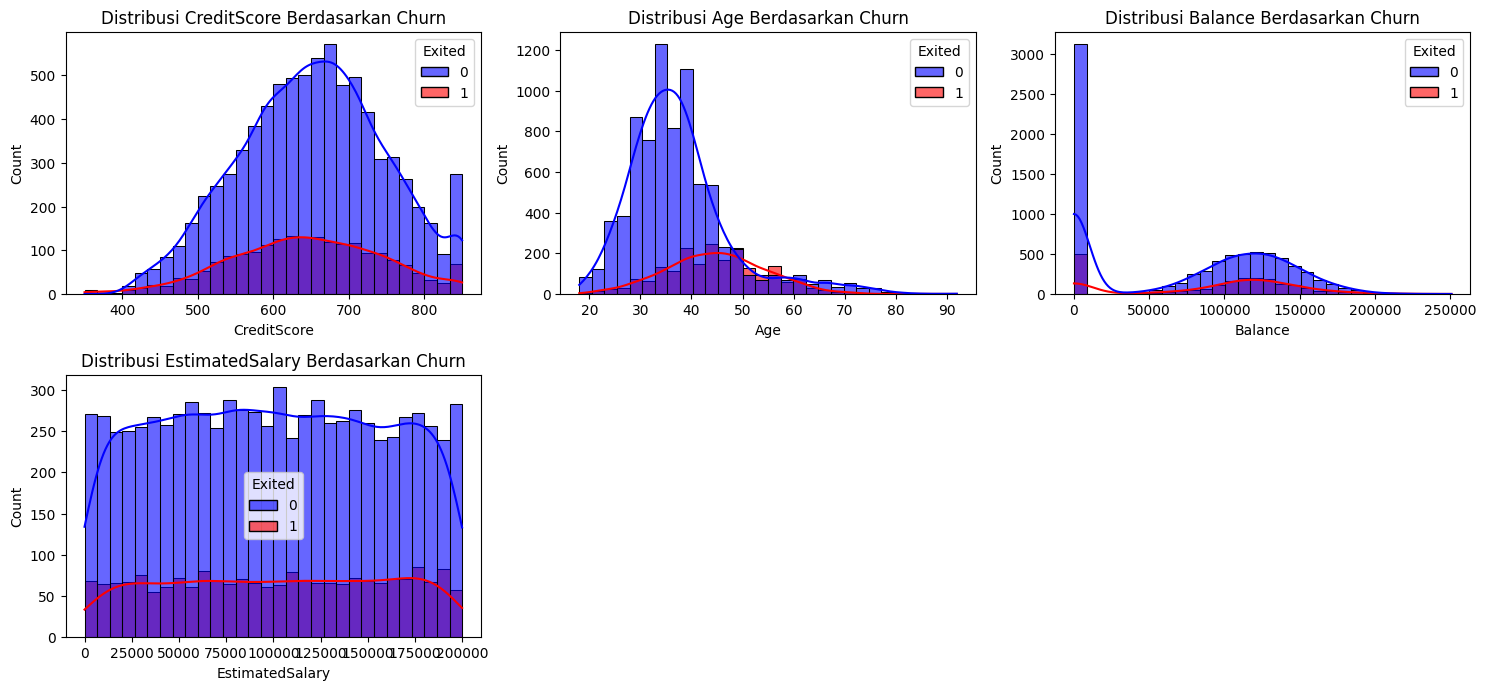

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Numerical features
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Set figure size
plt.figure(figsize=(15,10))

# Loop through each feature and plot the distribution and calculate skewness based on Exited
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Use a 3x3 grid
    # Plot based on Exited (0 and 1)
    sns.histplot(data=churn_df, x=feature, hue="Exited", kde=True, bins=30, palette=['blue', 'red'], alpha=0.6)
    plt.title(f"Distribusi {feature} Berdasarkan Churn")

    # Calculate skewness for Exited = 0 (non-churn), Exited = 1 (churn), and entire dataset
    skew_all = churn_df[feature].skew()
    skew_non_churn = churn_df[churn_df['Exited'] == 0][feature].skew()
    skew_churn = churn_df[churn_df['Exited'] == 1][feature].skew()

    # Print skewness and categorize it for entire data, Exited = 0, and Exited = 1
    def skew_type(skew_value):
        if skew_value > 0:
            return "Right Skewed"
        elif skew_value < 0:
            return "Left Skewed"
        else:
            return "Symmetric / Normal"

    # Print skewness for entire data, Exited = 0, and Exited = 1
    print(f"Skewness for {feature} (Entire Data): {skew_all:.3f} - {skew_type(skew_all)}")
    print(f"Skewness for {feature} (Exited = 0 - Non-Churn): {skew_non_churn:.3f} - {skew_type(skew_non_churn)}")
    print(f"Skewness for {feature} (Exited = 1 - Churn): {skew_churn:.3f} - {skew_type(skew_churn)}")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

1.	CreditScore:
-   Seluruh Data: Skewness = -0.072 (Left Skewed) – Distribusi skor kredit sedikit terdistorsi ke kiri, dengan sebagian besar pelanggan memiliki skor kredit tinggi, dan beberapa skor yang sangat rendah.
-	Tidak Churn (Exited = 0): Skewness = -0.047 (Left Skewed) – Sedikit left skewed (skor kredit lebih tinggi dengan beberapa outliers rendah).
-	Churn (Exited = 1): Skewness = -0.141 (Left Skewed) – Lebih left skewed (pelanggan churn cenderung memiliki skor kredit rendah).
-	Insight: Pelanggan churn lebih cenderung memiliki skor kredit rendah, yang menunjukkan risiko tinggi.
2.	Age:
-   Seluruh Data: Skewness = 1.011 (Right Skewed) – Umur pelanggan cenderung lebih muda secara keseluruhan, dengan sebagian besar pelanggan di bawah usia 40 tahun.
-	Tidak Churn (Exited = 0): Skewness = 1.378 (Right Skewed) – Right skewed (lebih banyak pelanggan muda).
-	Churn (Exited = 1): Skewness = 0.078 (Right Skewed) – Sedikit right skewed, lebih merata.
-	Insight: Pelanggan yang tidak churn lebih cenderung lebih muda, sedangkan pelanggan yang churn memiliki distribusi usia yang lebih merata. Usia bukan satu-satunya faktor yang mempengaruhi churn, tetapi generasi muda mungkin lebih loyal.
3.	Balance:
-   Seluruh Data: Skewness = -0.141 (Left Skewed) – Saldo akun cenderung lebih rendah, dengan beberapa pelanggan memiliki saldo yang sangat tinggi.
-	Tidak Churn (Exited = 0): Skewness = -0.047 (Left Skewed) – Sedikit left skewed (saldo lebih rendah dengan beberapa pelanggan memiliki saldo tinggi).
-	Churn (Exited = 1): Skewness = -0.513 (Left Skewed) – Left skewed (saldo pelanggan churn sangat rendah).
-	Insight: Pelanggan dengan saldo rendah lebih cenderung churn.
4.	EstimatedSalary:
-   Seluruh Data: Skewness = 0.002 (Hampir simetris, sedikit Right Skewed) – Gaji pelanggan sedikit terdistorsi ke kanan, dengan sebagian besar pelanggan memiliki gaji menengah hingga tinggi.
-	Tidak Churn (Exited = 0): Skewness = 0.011 (Right Skewed) – Hampir simetris, sedikit right skewed.
-	Churn (Exited = 1): Skewness = -0.033 (Left Skewed) – Left skewed (pelanggan churn cenderung memiliki gaji lebih rendah).
-	Insight: Pelanggan dengan gaji rendah lebih cenderung churn.

Kesimpulan: 
- Pelanggan dengan saldo rendah, skor kredit rendah, dan gaji rendah lebih berisiko churn. Fokus pada meningkatkan nilai-nilai ini bisa membantu mengurangi churn.

In [159]:
import pandas as pd
import plotly.express as px

# List of numerical features for the boxplot
features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Loop to create boxplots for each feature
for feature in features:
    # Calculate summary statistics for each feature by Exited
    summary_stats = churn_df.groupby('Exited')[feature].describe()
    print(f"\nSummary Statistics for {feature} (Grouped by Churn):")
    print(summary_stats)

    # Calculate IQR, lower fence, upper fence, and outliers for Exited = 0 (Non-Churn)
    Q1 = churn_df[feature].quantile(0.25)
    Q3 = churn_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = churn_df[(churn_df[feature] < lower_fence) | (churn_df[feature] > upper_fence)]

    # Print the total number of outliers and the outliers themselves
    print(f"Total number of outliers for {feature}: {len(outliers)}")
    print(f"Outliers for {feature}: {', '.join(map(str, outliers[feature].values))}")

    # Create the boxplot for the feature
    fig = px.box(churn_df, x="Exited", y=feature,
                 color="Exited",
                 category_orders={'Exited': ['0', '1']},
                 title=f'Boxplot Distribusi {feature} Berdasarkan Churn',
                 labels={feature: feature, 'Exited': 'Churn (Exited=1, Non-Churn=0)'},
                 color_discrete_map={'0': 'blue', '1': 'red'})

    # Set layout properties
    fig.update_layout(
        title=f'Boxplot Distribusi {feature} Berdasarkan Churn',
        title_x=0.5,
        title_font=dict(size=18),
        template="plotly_dark",
        showlegend=False
    )

    # Show the plot
    fig.show()


Summary Statistics for CreditScore (Grouped by Churn):
         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0
Total number of outliers for CreditScore: 15
Outliers for CreditScore: 376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350



Summary Statistics for Age (Grouped by Churn):
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0
Total number of outliers for Age: 359
Outliers for Age: 66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 


Summary Statistics for Balance (Grouped by Churn):
         count          mean           std  min       25%        50%  \
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

              75%        max  
Exited                        
0       126410.28  221532.80  
1       131433.33  250898.09  
Total number of outliers for Balance: 0
Outliers for Balance: 



Summary Statistics for EstimatedSalary (Grouped by Churn):
         count           mean           std    min       25%        50%  \
Exited                                                                    
0       7963.0   99738.391772  57405.586966  90.07  50783.49   99645.04   
1       2037.0  101465.677531  57912.418071  11.58  51907.72  102460.84   

               75%        max  
Exited                         
0       148609.955  199992.48  
1       152422.910  199808.10  
Total number of outliers for EstimatedSalary: 0
Outliers for EstimatedSalary: 


Insight:
1. CreditScore:
    -	Pelanggan yang churn cenderung memiliki CreditScore lebih rendah dibandingkan dengan non-churn, meskipun rentang nilai untuk kedua grup hampir sama.
    -	Ada sejumlah outliers pada skor kredit yang sangat rendah (di bawah 373 dan 405), yang perlu dianalisis lebih lanjut karena berpotensi mewakili pelanggan dengan risiko lebih tinggi untuk churn.
2. Age:
    -	Pelanggan yang churn memiliki usia lebih tua dibandingkan dengan non-churn.
    -	Outliers pada Age menunjukkan bahwa ada sejumlah pelanggan berusia sangat tua (lebih dari 70) yang mungkin memiliki perilaku churn yang berbeda. Pelanggan muda juga memiliki kemungkinan untuk churn, namun tidak sebanyak pelanggan yang lebih tua.
    -	75% nasabah churn berusia di atas 38 tahun dan nasabah berusia lebih tua memiliki kecenderungan lebih tinggi untuk churn
3. Balance (Saldo Akun):
    - Tidak ada outliers dalam saldo, yang menunjukkan bahwa data saldo lebih terkonsentrasi, meskipun saldo rendah tetap menjadi indikator penting, karena mungkin pelanggan dengan saldo rendah lebih cenderung churn.
4. EstimatedSalary:
    -	Pelanggan yang churn memiliki gaji sedikit lebih tinggi dibandingkan dengan non-churn, tetapi distribusi gaji secara keseluruhan tidak menunjukkan adanya outliers yang signifikan. Distribusi gaji relatif seragam antara kedua kelompok
    -	Tidak adanya outliers pada gaji menunjukkan bahwa rentang gaji lebih terdistribusi rata, yang mungkin menggambarkan bahwa baik pelanggan yang memiliki gaji tinggi maupun gaji rendah bisa mengalami churn.


In [160]:
import plotly.express as px

In [161]:
# Categorical features
features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Loop to create plots for each categorical feature with a 3x3 grid layout
for feature in features:
    # Create the histogram plot
    fig = px.histogram(churn_df, x=feature, color='Exited', barmode='group',
                       category_orders={'Exited': ['0', '1']},
                       title=f'Distribusi {feature} Berdasarkan Churn',
                       labels={feature: feature, 'Exited': 'Churn (Exited=1, Non-Churn=0)', 'count': 'Jumlah Pelanggan'},
                       color_discrete_map={'0': 'blue', '1': 'red'})

    # Set the layout properties
    fig.update_layout(
        title=f'Distribusi {feature} Berdasarkan Churn',
        title_x=0.5,  # Center the title
        title_font=dict(size=18),
        template="plotly_dark",  # Apply dark background
        showlegend=True,
        autosize=True
    )

    # Show the plot
    fig.show()

    # Print the count of each category and their percentage for the current feature
    print(f"\n{feature} - Count and Percentage:")
    print(churn_df[feature].value_counts())
    print(churn_df[feature].value_counts(normalize=True))
    print(f'Unique values: {churn_df[feature].unique()}')
    print(f'Unique values count: {len(churn_df[feature].unique())}')


Geography - Count and Percentage:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64
Unique values: ['France' 'Spain' 'Germany']
Unique values count: 3



Gender - Count and Percentage:
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64
Unique values: ['Female' 'Male']
Unique values count: 2



Tenure - Count and Percentage:
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
Tenure
2     0.1048
1     0.1035
7     0.1028
8     0.1025
5     0.1012
3     0.1009
4     0.0989
9     0.0984
6     0.0967
10    0.0490
0     0.0413
Name: proportion, dtype: float64
Unique values: [ 2  1  8  7  4  6  3 10  5  9  0]
Unique values count: 11



NumOfProducts - Count and Percentage:
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
NumOfProducts
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: proportion, dtype: float64
Unique values: [1 3 2 4]
Unique values count: 4



HasCrCard - Count and Percentage:
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
HasCrCard
1    0.7055
0    0.2945
Name: proportion, dtype: float64
Unique values: [1 0]
Unique values count: 2



IsActiveMember - Count and Percentage:
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
IsActiveMember
1    0.5151
0    0.4849
Name: proportion, dtype: float64
Unique values: [1 0]
Unique values count: 2


Insight:
- Geography: Mayoritas pelanggan berasal dari Prancis, dengan sekitar 50% dari total pelanggan. Jerman dan Spanyol memiliki proporsi yang lebih kecil.
- Gender: Ada sedikit lebih banyak pelanggan pria dibandingkan wanita, dengan perbedaan sekitar 9%.
- Tenure: Sebagian besar pelanggan telah menjadi pelanggan selama 1-2 tahun. Ini mungkin menunjukkan bahwa perusahaan fokus pada akuisisi pelanggan baru. Nilai tenure yang paling umum adalah 2, 1, 7, 8, dan 5 tahun, dengan 2 tahun memiliki jumlah tertinggi (1048 pelanggan). Tenure yang paling sedikit adalah 0 tahun, yang menunjukkan pelanggan baru atau data tenure yang hilang.
- NumOfProducts: Mayoritas pelanggan memiliki 1 atau 2 produk, dengan sangat sedikit yang menggunakan lebih dari 2 produk (Sangat sedikit pelanggan yang memiliki 3 atau 4 produk (sekitar 3% total)). Hal ini menunjukkan adanya potensi untuk menjual produk tambahan atau cross-selling kepada pelanggan yang ada.
- HasCrCard: Sebagian besar pelanggan memiliki kartu kredit (70.55%), yang menunjukkan bahwa produk ini sangat populer dan penting.
- IsActiveMember: Lebih dari separuh pelanggan adalah anggota aktif, namun masih ada proporsi yang cukup besar (48.49%) yang tidak aktif. Ini bisa menjadi area fokus untuk meningkatkan keterlibatan anggota.

#### Pre-processing

Kondisi Churn

In [162]:
# Mendefinisikan fungsi churned_yes
def churned_yes(row):
    if (row['Balance'] == 0 and row['EstimatedSalary'] != 0) or (row['Exited'] == 1) or (row['Balance'] == 0 and row['IsActiveMember'] == 0):
        return 1
    else:
        return row['Exited']

In [163]:
# Menerapkan fungsi churned_yes ke setiap baris DataFrame churn_df
churn_df['Churn'] = churn_df.apply(churned_yes, axis=1)

In [164]:
# Menampilkan beberapa baris pertama dari DataFrame dengan kolom baru
churn_df[['Balance', 'EstimatedSalary', 'Exited', 'IsActiveMember', 'Churn']].head()

,Balance,EstimatedSalary,Exited,IsActiveMember,Churn
0,0.00,101348.88,1,1,1
1,83807.86,112542.58,0,1,0
2,159660.80,113931.57,1,0,1
3,0.00,93826.63,0,0,1
4,125510.82,79084.10,0,1,0


Proporsi Churn vs Tidak Churn

In [165]:
# Menghitung proporsi churn vs tidak churn
churn_count = churn_df['Churn'].value_counts()
fig = px.pie(churn_count, names=churn_count.index, values=churn_count.values,
             title='Distribusi Churn vs Tidak Churn', color_discrete_sequence=px.colors.qualitative.G10)

# Mengubah latar belakang menjadi hitam
fig.update_layout(
    plot_bgcolor='white',   # Latar belakang plot menjadi hitam
    paper_bgcolor='black',  # Latar belakang halaman menjadi hitam
    font_color='white'      # Mengubah warna teks menjadi putih agar terlihat jelas di latar belakang hitam
)

fig.show()

Dapat diketahui bahwa pelanggan yang tidak churn berjumlah 4846 dan pelanggan yang churn berjumlah 5154

Grouping `CreditScore` FICO SCORE
- 300 - 579: Poor
- 580 - 669: Fair
- 670 - 739: Good
- 740 - 799: Very Good
- 800 - 850: Excelent

- Reference: https://www.google.com/url?sa=i&url=https%3A%2F%2Fmoney.com%2Fwhat-is-a-credit-score%2F&psig=AOvVaw1N1iv7s0UCACTdO_TVfQxc&ust=1739786508846000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCKiy9_n3x4sDFQAAAAAdAAAAABAE

In [166]:
# Menentukan bins dan labels untuk kategori FICO Score
bins = [300, 579, 669, 739, 799, 850]  # Rentang nilai
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']  # Nama kategori

# Membuat kolom baru 'CreditScoreCategory' berdasarkan binning
churn_df['CreditScoreCategory'] = pd.cut(churn_df['CreditScore'], bins=bins, labels=labels, right=True)

In [167]:
# Menampilkan beberapa baris data dengan kategori yang baru dibuat
churn_df[['CreditScore', 'CreditScoreCategory']].head()

,CreditScore,CreditScoreCategory
0,619,Fair
1,608,Fair
2,502,Poor
3,699,Good
4,850,Excellent


Visualisasi CreditScore

In [168]:
# Menghitung jumlah dan persentase untuk setiap kategori CreditScoreCategory berdasarkan churn (0 dan 1)
category_counts_by_churn = churn_df.groupby(['Churn', 'CreditScoreCategory']).size().unstack(fill_value=0)
# Menghitung persentase berdasarkan seluruh data
category_percentages_total = category_counts_by_churn.divide(len(churn_df)) * 100

# Menampilkan jumlah dan persentase untuk setiap kategori berdasarkan churn
print("Jumlah dan Persentase untuk setiap kategori CreditScoreCategory berdasarkan churn:")
for churn_value in category_counts_by_churn.index:
    print(f"\nChurn = {churn_value}:")
    for category in category_counts_by_churn.columns:
        # Jumlah berdasarkan churn (0 dan 1)
        count = category_counts_by_churn.loc[churn_value, category]
        # Persentase berdasarkan seluruh data
        percentage = (count / len(churn_df)) * 100
        print(f"  {category}: {count} ({percentage:.2f}%)")

# Visualisasi distribusi berdasarkan 'CreditScoreCategory' dan 'Churn'
fig = px.histogram(churn_df, x="CreditScoreCategory", color="Churn",
                   title="Distribusi Berdasarkan CreditScoreCategory dan Churn",
                   labels={"CreditScoreCategory": "Credit Score Category", "Churn": "Churn (0 = No, 1 = Yes)"},
                   category_orders={"CreditScoreCategory": ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']},
                   color_discrete_map={0: "blue", 1: "red"})

# Mengubah background menjadi hitam
fig.update_layout(
    template="plotly_dark",  # Menggunakan template background gelap
    title_font=dict(size=24, color="white", family="Arial"),  # Font title
    xaxis_title_font=dict(size=18, color="white"),  # Font sumbu X
    yaxis_title_font=dict(size=18, color="white"),  # Font sumbu Y
    xaxis_tickfont=dict(size=14, color="white"),  # Font tick sumbu X
    yaxis_tickfont=dict(size=14, color="white"),  # Font tick sumbu Y
    plot_bgcolor='black',  # Background plot hitam
    paper_bgcolor='black',  # Background luar plot hitam
    font=dict(color="white"),  # Warna font putih untuk teks
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor="gray"),  # Grid sumbu X
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor="gray")  # Grid sumbu Y
)

# Menampilkan grafik
fig.show()

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_25180\4285104357.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Jumlah dan Persentase untuk setiap kategori CreditScoreCategory berdasarkan churn:

Churn = 0:
  Poor: 1093 (10.93%)
  Fair: 1629 (16.29%)
  Good: 1189 (11.89%)
  Very Good: 611 (6.11%)
  Excellent: 324 (3.24%)

Churn = 1:
  Poor: 1269 (12.69%)
  Fair: 1702 (17.02%)
  Good: 1239 (12.39%)
  Very Good: 613 (6.13%)
  Excellent: 331 (3.31%)


- Pelanggan dengan skor kredit rendah (Poor dan Fair) memiliki kecenderungan lebih tinggi untuk churn
- Pelanggan dengan skor kredit tinggi (Excellent) menunjukkan tingkat churn yang rendah, yang bisa berarti bahwa mereka lebih puas dengan layanan dan lebih mampu untuk mempertahankan hubungan dengan perusahaan.

Grouping `Age`
- 18-25 tahun: Young Adult
- 26-35 tahun: Early Career
- 36-45 tahun: Mid Career
- 46-55 tahun: Late Career
- 56-65 tahun: Pre-Retirement
- lebih dari 65 tahun: Retirement

In [169]:
import pandas as pd

# Menentukan bins dan labels untuk kategori umur
bins = [18, 25, 35, 45, 55, 65, 100]  # Rentang usia berdasarkan kategori
labels = ['Young Adult', 'Early Career', 'Mid Career', 'Late Career', 'Pre-Retirement', 'Retirement']  # Nama kategori

# Menggunakan pd.cut untuk membuat kolom kategori Age
churn_df['AgeCategory'] = pd.cut(churn_df['Age'], bins=bins, labels=labels, right=True)

In [170]:
churn_df[['Age', 'AgeCategory']].head()

,Age,AgeCategory
0,42,Mid Career
1,41,Mid Career
2,42,Mid Career
3,39,Mid Career
4,43,Mid Career


In [171]:
# Menghitung jumlah dan persentase untuk setiap kategori umur berdasarkan churn (0 dan 1)
category_counts_by_churn = churn_df.groupby(['Exited', 'AgeCategory']).size().unstack(fill_value=0)
category_percentages_by_churn = category_counts_by_churn.divide(category_counts_by_churn.sum(axis=1), axis=0) * 100

# Menampilkan jumlah dan persentase untuk setiap kategori berdasarkan churn
print("Jumlah dan Persentase untuk setiap kategori AgeCategory berdasarkan churn:")
for churn_value in category_counts_by_churn.index:
    print(f"\nChurn = {churn_value}:")
    for category in category_counts_by_churn.columns:
        # Jumlah berdasarkan churn (0 dan 1)
        count = category_counts_by_churn.loc[churn_value, category]
        # Persentase berdasarkan seluruh data
        percentage = (count / len(churn_df)) * 100
        print(f"  {category}: {count} ({percentage:.2f}%)")

# Visualisasi distribusi berdasarkan 'AgeCategory' dan 'Exited'
fig = px.histogram(churn_df, x="AgeCategory", color="Exited",
                   title="Distribusi Berdasarkan AgeCategory dan Churn",
                   labels={"AgeCategory": "Kategori Umur", "Exited": "Churn (0 = Tidak, 1 = Ya)"},
                   category_orders={"AgeCategory": ['Young Adult', 'Early Career', 'Mid Career', 'Late Career', 'Pre-Retirement', 'Retirement']},
                   color_discrete_map={0: "blue", 1: "red"})

# Mengubah background menjadi hitam
fig.update_layout(
    template="plotly_dark",  # Menggunakan template background gelap
    title_font=dict(size=24, color="white", family="Arial"),  # Font title
    xaxis_title_font=dict(size=18, color="white"),  # Font sumbu X
    yaxis_title_font=dict(size=18, color="white"),  # Font sumbu Y
    xaxis_tickfont=dict(size=14, color="white"),  # Font tick sumbu X
    yaxis_tickfont=dict(size=14, color="white"),  # Font tick sumbu Y
    plot_bgcolor='black',  # Background plot hitam
    paper_bgcolor='black',  # Background luar plot hitam
    font=dict(color="white"),  # Warna font putih untuk teks
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor="gray"),  # Grid sumbu X
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor="gray")  # Grid sumbu Y
)

# Menampilkan grafik
fig.show()

Jumlah dan Persentase untuk setiap kategori AgeCategory berdasarkan churn:

Churn = 0:
  Young Adult: 545 (5.45%)
  Early Career: 3241 (32.41%)
  Mid Career: 3003 (30.03%)
  Late Career: 648 (6.48%)
  Pre-Retirement: 277 (2.77%)
  Retirement: 229 (2.29%)

Churn = 1:
  Young Adult: 44 (0.44%)
  Early Career: 301 (3.01%)
  Mid Career: 733 (7.33%)
  Late Career: 663 (6.63%)
  Pre-Retirement: 259 (2.59%)
  Retirement: 35 (0.35%)


C:\Users\WIN 10\AppData\Local\Temp\ipykernel_25180\2639220182.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- Pelanggan dengan usia lebih muda (Young Adult) dan kategori usia yang lebih tua (Retirement) cenderung memiliki tingkat churn yang rendah. Pelanggan yang lebih muda mungkin lebih loyal, sementara pelanggan yang lebih tua mungkin sudah lebih stabil dalam memilih produk atau layanan.
- Pelanggan di usia karier tengah (Mid Career dan Late Career) cenderung memiliki tingkat churn yang lebih tinggi, yang menunjukkan bahwa mereka lebih cenderung untuk mengganti produk atau layanan berdasarkan perubahan prioritas, pekerjaan, atau gaya hidup. Ini mungkin menandakan bahwa penyesuaian produk dan penawaran lebih relevan perlu dilakukan untuk segmen ini.
- Pelanggan di tahap awal dan akhir karier (Early Career, Pre-Retirement, and Retirement) memiliki kecenderungan untuk tetap bertahan, dengan jumlah churn yang relatif lebih rendah dibandingkan dengan kategori usia yang lebih tengah.

Groping `Balance`

In [172]:
import pandas as pd

# Definisi fungsi untuk melakukan grouping berdasarkan bins dan label
def grouping_data(df, bins, labels, column_name):
    df[column_name + 'Category'] = pd.cut(df[column_name], bins=bins, labels=labels, include_lowest=True)
    return df

# Mendapatkan nilai minimum, kuantil, dan maksimum dari kolom 'Balance'
min_balance = churn_df['Balance'].min() - 1
q1_balance = churn_df['Balance'].quantile(0.25)
q2_balance = churn_df['Balance'].quantile(0.50)
q3_balance = churn_df['Balance'].quantile(0.75)
max_balance = churn_df['Balance'].max()

# Definisi bin dan label kategori untuk Balance
bins_balance = [min_balance, q2_balance, q3_balance, max_balance]
labels_balance = ['Low Balance', 'Middle Balance', 'High Balance']

# Melakukan grouping pada churn_df
churn_df = grouping_data(churn_df, bins_balance, labels_balance, 'Balance')

In [173]:
# Menampilkan hasil grouping pada churn_df
churn_df[['Balance', 'BalanceCategory']].head()

,Balance,BalanceCategory
0,0.00,Low Balance
1,83807.86,Low Balance
2,159660.80,High Balance
3,0.00,Low Balance
4,125510.82,Middle Balance


In [174]:
# Menghitung jumlah untuk setiap kategori BalanceCategory berdasarkan churn (0 dan 1)
category_counts_by_churn = churn_df.groupby(['Exited', 'BalanceCategory']).size().unstack(fill_value=0)

# Menghitung persentase berdasarkan seluruh data
category_percentages_total = category_counts_by_churn.divide(len(churn_df)) * 100

# Menampilkan jumlah dan persentase untuk setiap kategori berdasarkan churn
print("Jumlah dan Persentase untuk setiap kategori BalanceCategory berdasarkan churn:")
for churn_value in category_counts_by_churn.index:
    print(f"\nChurn = {churn_value}:")
    for category in category_counts_by_churn.columns:
        # Jumlah berdasarkan churn (0 dan 1)
        count = category_counts_by_churn.loc[churn_value, category]
        # Persentase berdasarkan seluruh data
        percentage = (count / len(churn_df)) * 100
        print(f"  {category}: {count} ({percentage:.2f}%)")

# Visualisasi distribusi berdasarkan 'BalanceCategory' dan 'Exited'
fig = px.histogram(churn_df, x="BalanceCategory", color="Exited",
                   title="Distribusi Berdasarkan BalanceCategory dan Churn",
                   labels={"BalanceCategory": "Kategori Saldo", "Exited": "Churn (0 = Tidak, 1 = Ya)"},
                   category_orders={"BalanceCategory": ['Low Balance', 'Middle Balance', 'High Balance']},
                   color_discrete_map={0: "blue", 1: "red"})

# Mengubah background menjadi hitam
fig.update_layout(
    template="plotly_dark",  # Menggunakan template background gelap
    title_font=dict(size=24, color="white", family="Arial"),  # Font title
    xaxis_title_font=dict(size=18, color="white"),  # Font sumbu X
    yaxis_title_font=dict(size=18, color="white"),  # Font sumbu Y
    xaxis_tickfont=dict(size=14, color="white"),  # Font tick sumbu X
    yaxis_tickfont=dict(size=14, color="white"),  # Font tick sumbu Y
    plot_bgcolor='black',  # Background plot hitam
    paper_bgcolor='black',  # Background luar plot hitam
    font=dict(color="white"),  # Warna font putih untuk teks
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor="gray"),  # Grid sumbu X
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor="gray")  # Grid sumbu Y
)

# Menampilkan grafik
fig.show()

Jumlah dan Persentase untuk setiap kategori BalanceCategory berdasarkan churn:

Churn = 0:
  Low Balance: 4212 (42.12%)
  Middle Balance: 1843 (18.43%)
  High Balance: 1908 (19.08%)

Churn = 1:
  Low Balance: 788 (7.88%)
  Middle Balance: 657 (6.57%)
  High Balance: 592 (5.92%)


C:\Users\WIN 10\AppData\Local\Temp\ipykernel_25180\3996568178.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- Pelanggan dengan saldo rendah (Low Balance) lebih cenderung tidak churn, meskipun mereka berisiko lebih kecil, mereka tetap setia pada produk atau layanan meskipun memiliki dana terbatas.
- Pelanggan dengan saldo menengah (Middle Balance) memiliki sedikit kemungkinan churn dibandingkan dengan saldo tinggi, tetapi mereka lebih cenderung churn daripada pelanggan dengan saldo rendah dan saldo tinggi. Hal ini bisa dipengaruhi oleh biaya tambahan atau ketidakpuasan layanan.
- Pelanggan dengan saldo tinggi (High Balance) menunjukkan loyalitas yang lebih tinggi, dengan tingkat churn yang terendah, yang berarti mereka lebih terikat dengan produk atau layanan yang mereka gunakan.

Grouping `EstimatedSalary`

In [175]:
import pandas as pd

# Definisi fungsi untuk melakukan grouping berdasarkan bins dan label
def grouping_data(df, bins, labels, column_name):
    df[column_name + 'Category'] = pd.cut(df[column_name], bins=bins, labels=labels, include_lowest=True)
    return df

# Mendapatkan nilai minimum, kuantil, dan maksimum dari kolom 'EstimatedSalary'
min_salary = churn_df['EstimatedSalary'].min() - 1
q1_salary = churn_df['EstimatedSalary'].quantile(0.25)
q2_salary = churn_df['EstimatedSalary'].quantile(0.50)
q3_salary = churn_df['EstimatedSalary'].quantile(0.75)
max_salary = churn_df['EstimatedSalary'].max()

# Definisi bin dan label kategori untuk EstimatedSalary
bins_salary = [min_salary, q2_salary, q3_salary, max_salary]
labels_salary = ['Low Salary', 'Middle Salary', 'High Salary']

# Melakukan grouping pada churn_df
churn_df = grouping_data(churn_df, bins_salary, labels_salary, 'EstimatedSalary')

In [176]:
# Menampilkan hasil grouping pada churn_df
churn_df[['EstimatedSalary', 'EstimatedSalaryCategory']].head()

,EstimatedSalary,EstimatedSalaryCategory
0,101348.88,Middle Salary
1,112542.58,Middle Salary
2,113931.57,Middle Salary
3,93826.63,Low Salary
4,79084.10,Low Salary


Visualisasi Salary

In [177]:
# Menghitung jumlah untuk setiap kategori EstimatedSalaryCategory berdasarkan churn (0 dan 1)
salary_category_counts_by_churn = churn_df.groupby(['Exited', 'EstimatedSalaryCategory']).size().unstack(fill_value=0)

# Menghitung persentase berdasarkan total data (bukan berdasarkan kategori churn)
salary_category_percentages_total = churn_df['EstimatedSalaryCategory'].value_counts(normalize=True) * 100

# Menampilkan jumlah kategori Salary berdasarkan churn (0 dan 1) dan persentase berdasarkan seluruh data
print("Jumlah dan Persentase untuk setiap kategori EstimatedSalaryCategory berdasarkan churn:")
for churn_value in salary_category_counts_by_churn.index:
    print(f"\nChurn = {churn_value}:")
    for category in salary_category_counts_by_churn.columns:
        # Jumlah berdasarkan churn (0 dan 1)
        count = salary_category_counts_by_churn.loc[churn_value, category]
        # Persentase berdasarkan total data
        percentage = (count / len(churn_df)) * 100
        print(f"  {category}: {count} ({percentage:.2f}%)")

# Menentukan urutan kategori berdasarkan Low, Middle, dan High Salary
category_order = ['Low Salary', 'Middle Salary', 'High Salary', 'Very High Salary', 'Extreme High Salary']

# Visualisasi distribusi kategori salary berdasarkan 'EstimatedSalaryCategory' dan churn (0 dan 1)
fig = px.histogram(churn_df, x="EstimatedSalaryCategory", color="Exited",
                   title="Distribusi Berdasarkan EstimatedSalaryCategory dan Churn",
                   labels={"EstimatedSalaryCategory": "Salary Category", "Exited": "Churn (0 = Tidak, 1 = Ya)"},
                   category_orders={"EstimatedSalaryCategory": category_order},  # Mengurutkan kategori salary
                   color_discrete_map={0: "blue", 1: "red"})  # Warna untuk churn 0 dan 1

# Mengubah latar belakang menjadi hitam
fig.update_layout(
    template="plotly_dark",  # Menggunakan template dark background
    title_font=dict(size=24, color="white", family="Arial"),  # Mengatur font title
    xaxis_title_font=dict(size=18, color="white"),  # Mengatur font axis title
    yaxis_title_font=dict(size=18, color="white"),  # Mengatur font y-axis title
    xaxis_tickfont=dict(size=14, color="white"),  # Mengatur font x-axis ticks
    yaxis_tickfont=dict(size=14, color="white"),  # Mengatur font y-axis ticks
    showlegend=True,  # Menampilkan legend
    plot_bgcolor='black',  # Background plot hitam
    paper_bgcolor='black',  # Background luar plot hitam
    font=dict(color="white"),  # Warna font putih untuk teks
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor="gray"),  # Mengatur grid x-axis
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor="gray")  # Mengatur grid y-axis
)

# Menampilkan grafik
fig.show()

Jumlah dan Persentase untuk setiap kategori EstimatedSalaryCategory berdasarkan churn:

Churn = 0:
  Low Salary: 4005 (40.05%)
  Middle Salary: 1997 (19.97%)
  High Salary: 1961 (19.61%)

Churn = 1:
  Low Salary: 995 (9.95%)
  Middle Salary: 503 (5.03%)
  High Salary: 539 (5.39%)


C:\Users\WIN 10\AppData\Local\Temp\ipykernel_25180\3823951636.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- Pelanggan dengan gaji rendah (Low Salary) menunjukkan tingkat loyalitas yang tinggi (terlihat dari persentase churn yang rendah), mungkin karena mereka merasa terikat pada layanan yang terjangkau dan merasa lebih sulit untuk beralih.
- Pelanggan dengan gaji menengah (Middle Salary) lebih rentan churn, yang menunjukkan bahwa mereka mungkin lebih sensitif terhadap biaya atau kurang puas dengan produk yang mereka gunakan.
- Pelanggan dengan gaji tinggi (High Salary) meskipun sedikit churn, mereka lebih cenderung berpindah ke layanan lain yang dianggap memberikan nilai lebih atau fitur premium. Hal ini bisa menandakan bahwa mereka lebih mengutamakan kualitas dan eksklusivitas.

##### Encoding

1. Encoding Credit Score Category

In [178]:
# Menggunakan Ordinal Encoding untuk mengganti kategori dengan nilai numerik
ordinal_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}
churn_df['Credit_Score_Category'] = churn_df['CreditScoreCategory'].map(ordinal_mapping)

In [179]:
churn_df[['CreditScore', 'CreditScoreCategory', 'Credit_Score_Category']].head()

,CreditScore,CreditScoreCategory,Credit_Score_Category
0,619,Fair,1
1,608,Fair,1
2,502,Poor,0
3,699,Good,2
4,850,Excellent,4


2. Encoding Age

In [180]:
# Menggunakan Ordinal Encoding untuk mengganti kategori dengan nilai numerik
ordinal_mapping_age = {'Young Adult': 0, 'Early Career': 1, 'Mid Career': 2, 'Late Career': 3, 'Pre-Retirement': 4, 'Retirement': 5}
churn_df['Age_Category'] = churn_df['AgeCategory'].map(ordinal_mapping_age)

In [181]:
# Menampilkan hasilnya
churn_df[['Age', 'AgeCategory', 'Age_Category']].head()

,Age,AgeCategory,Age_Category
0,42,Mid Career,2
1,41,Mid Career,2
2,42,Mid Career,2
3,39,Mid Career,2
4,43,Mid Career,2


3. Encoding Balance

In [182]:
# Menggunakan Ordinal Encoding untuk mengganti kategori dengan nilai numerik
ordinal_mapping_balance = {'Low Balance': 0, 'Middle Balance': 1, 'High Balance': 2}
churn_df['Balance_Category'] = churn_df['BalanceCategory'].map(ordinal_mapping_balance)

In [183]:
# Menampilkan hasilnya
churn_df[['Balance', 'BalanceCategory', 'Balance_Category']].head()

,Balance,BalanceCategory,Balance_Category
0,0.00,Low Balance,0
1,83807.86,Low Balance,0
2,159660.80,High Balance,2
3,0.00,Low Balance,0
4,125510.82,Middle Balance,1


4. Encoding Salary

In [184]:
# Menggunakan Ordinal Encoding untuk mengganti kategori dengan nilai numerik
ordinal_mapping_salary = {'Low Salary': 0, 'Middle Salary': 1, 'High Salary': 2}
churn_df['Estimated_Salary_Category'] = churn_df['EstimatedSalaryCategory'].map(ordinal_mapping_salary)

In [185]:
# Menampilkan hasilnya
churn_df[['EstimatedSalary', 'EstimatedSalaryCategory', 'Estimated_Salary_Category']].head()

,EstimatedSalary,EstimatedSalaryCategory,Estimated_Salary_Category
0,101348.88,Middle Salary,1
1,112542.58,Middle Salary,1
2,113931.57,Middle Salary,1
3,93826.63,Low Salary,0
4,79084.10,Low Salary,0


5. Encoding Gender

In [186]:
# Mapping manual untuk mengonversi 'female' menjadi 1 dan 'male' menjadi 0
churn_df['Gender'] = churn_df['Gender'].map({'Female': 1, 'Male': 0})

In [187]:
churn_df['Gender']

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Gender, Length: 10000, dtype: int64

6. Encoding Geography

In [188]:
# Menggunakan One-Hot Encoding untuk Geography tanpa menghilangkan kategori pertama
churn_df = pd.get_dummies(churn_df, columns=['Geography'], drop_first=True)

# Mengonversi hasil One-Hot Encoding menjadi Boolean (0/1)
churn_df[['Geography_Spain', 'Geography_Germany']] = churn_df[['Geography_Spain', 'Geography_Germany']].astype(int)

Drop kolom yang tidak diperlukan

In [189]:
#drop data yang tidak diperlukan
churn_df.drop(['CreditScoreCategory','CreditScore', 'AgeCategory', 'Age', 'BalanceCategory', 'Balance', 'EstimatedSalaryCategory', 'EstimatedSalary', 'Exited'], axis=1, inplace=True)

In [190]:
churn_df

,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Churn,Credit_Score_Category,Age_Category,Balance_Category,Estimated_Salary_Category,Geography_Germany,Geography_Spain
0,1,2,1,1,1,1,1,2,0,1,0,0
1,1,1,1,0,1,0,1,2,0,1,0,1
2,1,8,3,1,0,1,0,2,2,1,0,0
3,1,1,2,0,0,1,2,2,0,0,0,0
4,1,2,1,1,1,0,4,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,5,2,1,0,1,3,2,0,0,0,0
9996,0,10,1,1,1,0,0,1,0,1,0,0
9997,1,7,1,0,1,1,2,2,0,0,0,0
9998,0,3,2,1,0,1,3,2,0,0,1,0


#### Modeling

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.colors as mcolors
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

In [192]:
# Import libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [193]:
# Pisahkan fitur (X) dan target (y)
X = churn_df.drop(columns=["Churn"])  # Semua fitur kecuali target
y = churn_df["Churn"]  # Target

In [194]:
# Split data menjadi training dan testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [195]:
#shape data train dan test
print(f"Shape data training: {X_train.shape}")
print(f"Shape data testing: {X_test.shape}")
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Shape data training: (8000, 11)
Shape data testing: (2000, 11)
Jumlah data training: 8000
Jumlah data testing: 2000


1. Logistic Regression

In [196]:
# Model Logistic Regression tanpa hyperparameter tuning
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



LogisticRegression()

In [197]:
# Prediksi data uji
y_pred_lr = model_lr.predict(X_test)

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



In [198]:
# Grid Search untuk hyperparameter tuning
logreg_tuning = LogisticRegression()

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    "penalty": ["l1", "l2"],  # Lasso (L1) and Ridge (L2)
    "solver": ["liblinear", "saga"],  # Solvers that support L1 and L2
}

# GridSearchCV untuk mencari kombinasi terbaik
grid_search_lr = GridSearchCV(logreg_tuning, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Cetak hasil terbaik
print("Best Hyperparameters:", grid_search_lr.best_params_)
print("Best Accuracy:", grid_search_lr.best_score_)

# Evaluasi model terbaik di data test
best_model = grid_search_lr.best_estimator_
y_pred_lr = best_model.predict(X_test)

# Evaluasi akhir
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.75925

Test Accuracy: 0.7615

Confusion Matrix:
[[703 266]
 [211 820]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       969
           1       0.76      0.80      0.77      1031

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



In [199]:
# K-Fold Cross Validation untuk model terbaik
bestmodel_lr = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=42)

# Inisialisasi K-Fold Cross Validation
kf_lr = KFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan K-Fold Cross Validation
cv_results_lr = cross_val_score(bestmodel_lr, X_train, y_train, cv=kf_lr, scoring='accuracy')

# Evaluasi hasil K-Fold Cross Validation
print(f"Accuracy per fold: {cv_results_lr}")
print(f"Mean accuracy across folds: {cv_results_lr.mean():.2%}")
print(f"Standard deviation of accuracy: {cv_results_lr.std():.2%}")

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



Accuracy per fold: [0.740625 0.751875 0.746875 0.73875  0.748125]
Mean accuracy across folds: 74.52%
Standard deviation of accuracy: 0.49%


e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



In [ ]:
# Definisikan model Logistic Regression dengan hyperparameter yang telah dituning
bestmodel_lr = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=42)

# Train the model
bestmodel_lr.fit(X_train, y_train)

# Prediksi untuk data training dan testing
y_train_pred_lr = bestmodel_lr.predict(X_train)
y_test_pred_lr = bestmodel_lr.predict(X_test)

# Evaluasi untuk data training
print("Data Training:")
print(classification_report(y_train, y_train_pred_lr))
print(confusion_matrix(y_train, y_train_pred_lr))

# Evaluasi untuk data testing
print("Data Testing:")
print("Akurasi", accuracy_score(y_test, y_test_pred_lr))
print("Presisi", precision_score(y_test, y_test_pred_lr))
print("Recall", recall_score(y_test, y_test_pred_lr))
print("F1 Score", f1_score(y_test, y_test_pred_lr))
print(classification_report(y_test, y_test_pred_lr))
print(confusion_matrix(y_test, y_test_pred_lr))

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



Data Training:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      3877
           1       0.74      0.79      0.76      4123

    accuracy                           0.75      8000
   macro avg       0.75      0.74      0.75      8000
weighted avg       0.75      0.75      0.75      8000

[[2712 1165]
 [ 864 3259]]
Data Testing:
Akurasi 0.753
Presisi 0.7429864253393665
Recall 0.7963142580019399
F1 Score 0.7687265917602997
              precision    recall  f1-score   support

           0       0.77      0.71      0.73       969
           1       0.74      0.80      0.77      1031

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

[[685 284]
 [210 821]]


e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



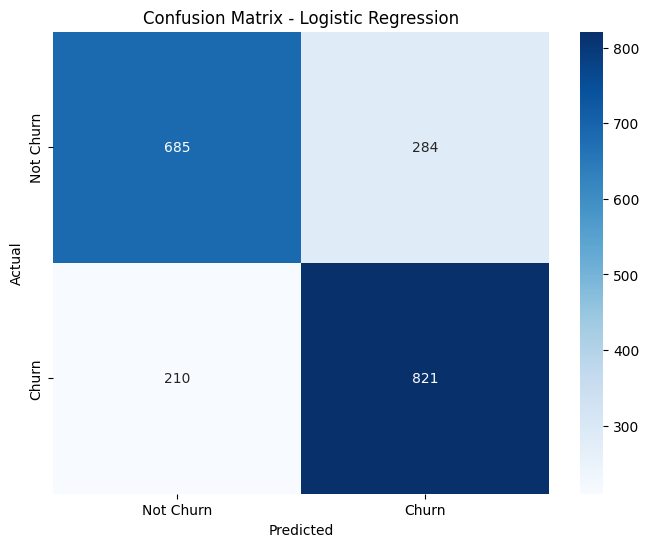

In [201]:
# Confusion matrix untuk Logistic Regression
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [202]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



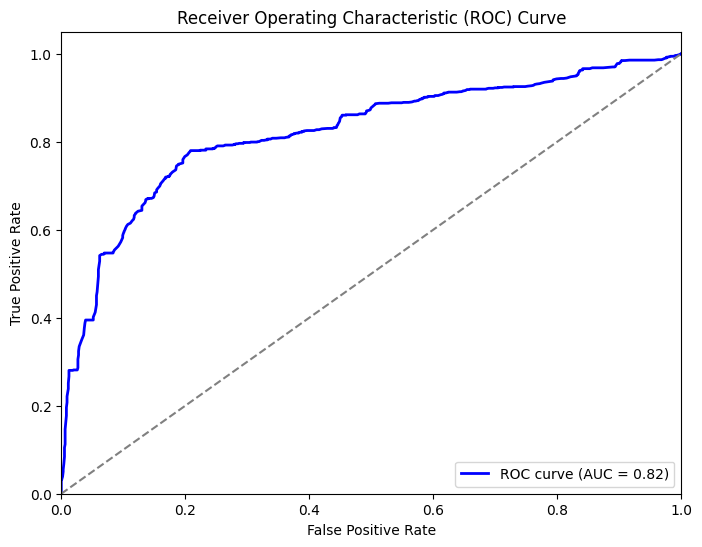

AUC: 0.82


In [203]:
# ROC dan AUC untuk model terbaik
y_prob_best_lr = bestmodel_lr.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif (1)

# Menghitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_lr)

# Menghitung AUC (Area Under Curve)
roc_auc_lr = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC value
print(f"AUC: {roc_auc_lr:.2f}")

2. Random Forest

In [204]:
# Model Random Forest tanpa hyperparameter tuning
mode_rf = RandomForestClassifier(random_state=42)
mode_rf.fit(X_train, y_train)

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



RandomForestClassifier(random_state=42)

In [205]:
# Prediksi data uji
y_pred_rf = mode_rf.predict(X_test)

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



In [206]:
# Grid Search untuk hyperparameter tuning
rf_tuning = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],  # Jumlah pohon
    "max_depth": [None, 10, 20, 30],  # Kedalaman maksimum pohon
    "min_samples_split": [2, 5, 10],  # Jumlah minimum sampel untuk pembelahan
    "min_samples_leaf": [1, 2, 4]  # Jumlah minimum sampel di daun pohon
}

# GridSearchCV untuk mencari kombinasi terbaik
grid_search_rf = GridSearchCV(rf_tuning, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Cetak hasil terbaik
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)

# Evaluasi model terbaik di data test
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Evaluasi akhir
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.8331250000000001

Test Accuracy: 0.8415

Confusion Matrix:
[[804 165]
 [152 879]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       969
           1       0.84      0.85      0.85      1031

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



In [207]:
# K-Fold Cross Validation untuk model terbaik
kf_rf = KFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan K-Fold Cross Validation
cv_results_rf = cross_val_score(best_model_rf, X_train, y_train, cv=kf_rf, scoring='accuracy')

# Evaluasi hasil K-Fold Cross Validation
print(f"\nAccuracy per fold: {cv_results_rf}")
print(f"Mean accuracy across folds: {cv_results_rf.mean():.2%}")
print(f"Standard deviation of accuracy: {cv_results_rf.std():.2%}")

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:




Accuracy per fold: [0.826875 0.826875 0.833125 0.82375  0.833125]
Mean accuracy across folds: 82.88%
Standard deviation of accuracy: 0.38%


e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



In [223]:
# Prediksi untuk data training dan testing
y_train_pred_rf = best_model_rf.predict(X_train)
y_test_pred_rf = best_model_rf.predict(X_test)

# Evaluasi untuk data training
print("Evaluasi pada Data Training:")
print("Confusion Matrix (Training):")
print(confusion_matrix(y_train, y_train_pred_rf))
print("Classification Report (Training):")
print(classification_report(y_train, y_train_pred_rf))

# Evaluasi untuk data testing
print("Evaluasi pada Data Testing:")
print("Confusion Matrix (Testing):")
print(confusion_matrix(y_test, y_test_pred_rf))
print("Classification Report (Testing):")
print("Akurasi", accuracy_score(y_test, y_test_pred_rf))
print("Presisi", precision_score(y_test, y_test_pred_rf))
print("Recall", recall_score(y_test, y_test_pred_rf))
print("F1 Score", f1_score(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



Evaluasi pada Data Training:
Confusion Matrix (Training):
[[3331  546]
 [ 539 3584]]
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3877
           1       0.87      0.87      0.87      4123

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000

Evaluasi pada Data Testing:
Confusion Matrix (Testing):
[[804 165]
 [152 879]]
Classification Report (Testing):
Akurasi 0.8415
Presisi 0.8419540229885057
Recall 0.8525703200775946
F1 Score 0.8472289156626506
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       969
           1       0.84      0.85      0.85      1031

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



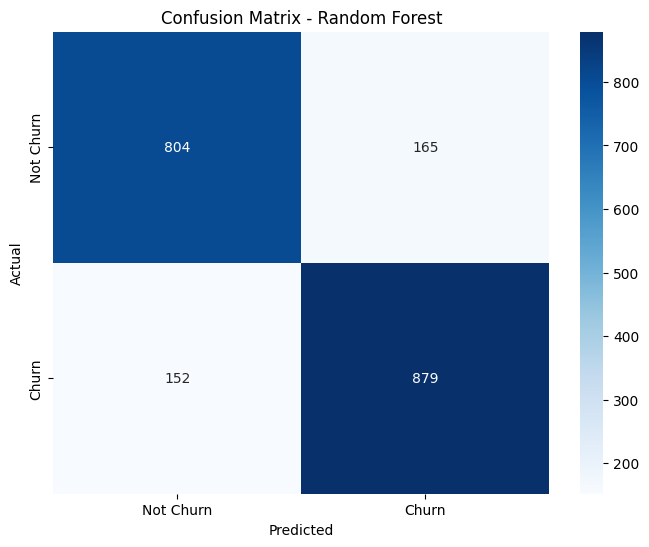

In [209]:
# Confusion matrix untuk Random Forest
cm_lr = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



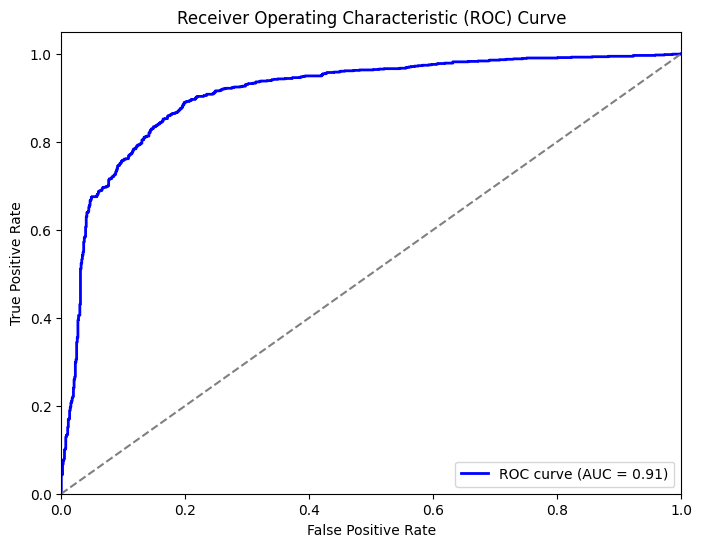

AUC: 0.91


In [210]:
# ROC dan AUC untuk model terbaik
y_prob_best_rf = best_model_rf.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif (1)

# Menghitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_rf)

# Menghitung AUC (Area Under Curve)
roc_auc_rf = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC value
print(f"AUC: {roc_auc_rf:.2f}")

3. Decision Tree

In [211]:
# Model Decision Tree tanpa hyperparameter tuning
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



DecisionTreeClassifier(random_state=42)

In [212]:
# Prediksi data uji
y_pred_dt = model_dt.predict(X_test)

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



In [213]:
# Grid Search untuk hyperparameter tuning
dt_tuning = DecisionTreeClassifier(random_state=42)

param_grid = {
    "max_depth": [None, 10, 20, 30],  # Kedalaman maksimum pohon
    "min_samples_split": [2, 5, 10],  # Jumlah minimum sampel untuk pembelahan
    "min_samples_leaf": [1, 2, 4],  # Jumlah minimum sampel di daun pohon
    "criterion": ["gini", "entropy"]  # Kriteria untuk pemisahan (Gini atau Entropy)
}

# GridSearchCV untuk mencari kombinasi terbaik
grid_search_dt = GridSearchCV(dt_tuning, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Cetak hasil terbaik
print("Best Hyperparameters:", grid_search_dt.best_params_)
print("Best Accuracy:", grid_search_dt.best_score_)

# Evaluasi model terbaik di data test
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)

# Evaluasi akhir
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy: 0.817

Test Accuracy: 0.83

Confusion Matrix:
[[801 168]
 [172 859]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       969
           1       0.84      0.83      0.83      1031

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



In [214]:
# K-Fold Cross Validation untuk model terbaik
kf_dt = KFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan K-Fold Cross Validation
cv_results_dt = cross_val_score(best_model_dt, X_train, y_train, cv=kf_dt, scoring='accuracy')

# Evaluasi hasil K-Fold Cross Validation
print(f"\nAccuracy per fold: {cv_results_dt}")
print(f"Mean accuracy across folds: {cv_results_dt.mean():.2%}")
print(f"Standard deviation of accuracy: {cv_results_dt.std():.2%}")

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast




Accuracy per fold: [0.821875 0.821875 0.814375 0.8      0.8175  ]
Mean accuracy across folds: 81.51%
Standard deviation of accuracy: 0.81%


e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



In [224]:
# Prediksi untuk data training dan testing
y_train_pred_dt = best_model_dt.predict(X_train)
y_test_pred_dt = best_model_dt.predict(X_test)

# Evaluasi untuk data training
print("Evaluasi pada Data Training:")
print("Confusion Matrix (Training):")
print(confusion_matrix(y_train, y_train_pred_dt))
print("Classification Report (Training):")
print(classification_report(y_train, y_train_pred_dt))

# Evaluasi untuk data testing
print("Evaluasi pada Data Testing:")
print("Confusion Matrix (Testing):")
print(confusion_matrix(y_test, y_test_pred_dt))
print("Classification Report (Testing):")
print("Akurasi", accuracy_score(y_test, y_test_pred_dt))
print("Presisi", precision_score(y_test, y_test_pred_dt))
print("Recall", recall_score(y_test, y_test_pred_dt))
print("F1 Score", f1_score(y_test, y_test_pred_dt))
print(classification_report(y_test, y_test_pred_dt))

Evaluasi pada Data Training:
Confusion Matrix (Training):
[[3326  551]
 [ 592 3531]]
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3877
           1       0.87      0.86      0.86      4123

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000

Evaluasi pada Data Testing:
Confusion Matrix (Testing):
[[801 168]
 [172 859]]
Classification Report (Testing):
Akurasi 0.83
Presisi 0.8364167478091529
Recall 0.8331716779825412
F1 Score 0.8347910592808552
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       969
           1       0.84      0.83      0.83      1031

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



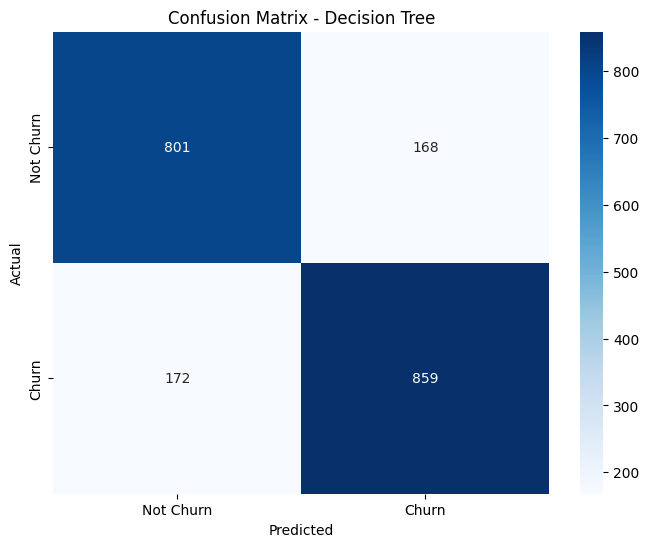

In [216]:
# Confusion matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



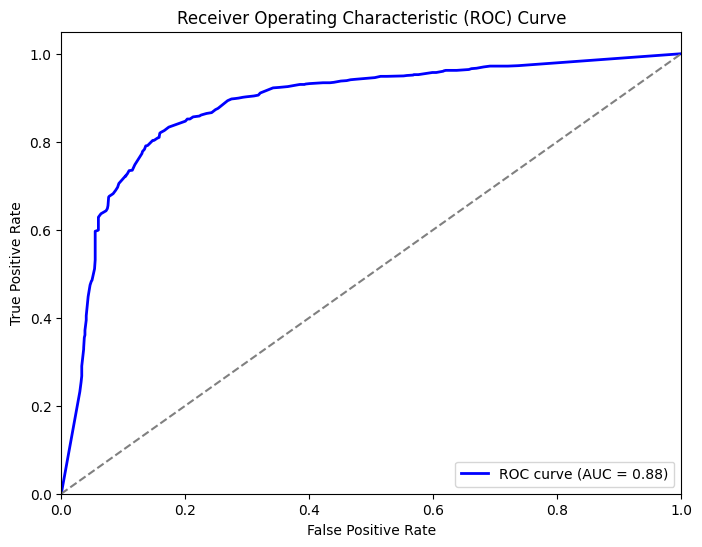

AUC: 0.88


In [217]:
# ROC dan AUC untuk model terbaik
y_prob_best_dt = best_model_dt.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif (1)

# Menghitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_dt)

# Menghitung AUC (Area Under Curve)
roc_auc_dt = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC value
print(f"AUC: {roc_auc_dt:.2f}")

Perbandingan Model

In [218]:
# Menghitung metrik evaluasi untuk setiap model
metrics = {
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression"],
    "Accuracy": [accuracy_score(y_test, y_test_pred_rf), accuracy_score(y_test, y_test_pred_dt), accuracy_score(y_test, y_test_pred_lr)],
    "Recall": [recall_score(y_test, y_test_pred_rf), recall_score(y_test, y_test_pred_dt), recall_score(y_test, y_test_pred_lr)],
    "Precision": [precision_score(y_test, y_test_pred_rf), precision_score(y_test, y_test_pred_dt), precision_score(y_test, y_test_pred_lr)],
    "F1-Score": [f1_score(y_test, y_test_pred_rf), f1_score(y_test, y_test_pred_dt), f1_score(y_test, y_test_pred_lr)],
    "AUC": [roc_auc_rf, roc_auc_dt, roc_auc_lr]
}

# Membuat dataframe
model_metrics_df = pd.DataFrame(metrics)
model_metrics_df

,Model,Accuracy,Recall,Precision,F1-Score,AUC
0,Random Forest,0.8415,0.852570,0.841954,0.847229,0.910047
1,Decision Tree,0.8300,0.833172,0.836417,0.834791,0.883590
2,Logistic Regression,0.7530,0.796314,0.742986,0.768727,0.821731


1. Akurasi (Accuracy):
   - Random Forest: 84.15% – Model ini memiliki akurasi tertinggi di antara ketiga model.
   - Decision Tree: 83.00% – Akurasi sedikit lebih rendah dibandingkan dengan Random Forest.
   - Logistic Regression: 75.30% – Akurasi lebih rendah dibandingkan kedua model lainnya.
   - Insight: Random Forest memberikan akurasi tertinggi, menunjukkan bahwa model ini lebih efektif dalam memprediksi dengan benar.

2. Recall (Kemampuan Deteksi):
   - Random Forest: 85.26% – Memiliki recall tertinggi, yang berarti model ini lebih efektif dalam mendeteksi pelanggan churn.
   - Decision Tree: 83.32% – Recall sedikit lebih rendah dibandingkan dengan Random Forest.
   - Logistic Regression: 79.63% – Recall lebih rendah, berarti model ini kurang baik dalam mendeteksi pelanggan churn.
   - Insight: Random Forest memiliki recall tertinggi, yang sangat penting dalam kampanye retensi karena dapat mendeteksi lebih banyak pelanggan berisiko churn.

3. Precision (Ketepatan):
   - Random Forest: 84.20% – Memiliki precision tertinggi, artinya model ini menghasilkan lebih sedikit False Positives.
   - Decision Tree: 83.64% – Precision sedikit lebih rendah dari Random Forest.
   - Logistic Regression: 74.30% – Precision lebih rendah, menunjukkan lebih banyak False Positives.
   - Insight: Random Forest memiliki precision yang lebih baik, yang berarti lebih sedikit pelanggan yang diprediksi churn, tetapi sebenarnya tidak churn.

4. F1-Score:
   - Random Forest: 84.72% – F1-Score tertinggi, menunjukkan keseimbangan antara precision dan recall.
   - Decision Tree: 83.48% – F1-Score sedikit lebih rendah.
   - Logistic Regression: 76.87% – F1-Score lebih rendah, mengindikasikan ketidakseimbangan antara precision dan recall.
   - Insight: Random Forest memiliki F1-Score tertinggi, yang menunjukkan keseimbangan yang baik antara precision dan recall.

5. AUC (Area Under the Curve):
   - Random Forest: 0.91 – AUC tertinggi, menunjukkan kemampuan terbaik untuk membedakan antara churn dan non-churn.
   - Decision Tree: 0.88 – AUC lebih rendah dibandingkan Random Forest.
   - Logistic Regression: 0.82 – AUC lebih rendah, menunjukkan kemampuan model ini lebih terbatas dalam membedakan kelas positif dan negatif.
   - Insight: Random Forest memiliki AUC tertinggi, menunjukkan kemampuan terbaik dalam membedakan pelanggan yang churn dan yang tidak churn.

##### Bisnis

1. Memprediksi Pelanggan yang Berisiko untuk Churn

In [219]:
df = pd.read_csv('E:/baru/churn/churn.csv', sep=',')
pd.set_option('display.max_column', None)

Customer Lifetime Value (CLV) adalah nilai total yang dihasilkan oleh seorang pelanggan selama hubungan mereka dengan perusahaan.
Dengan mengalikan saldo dengan jumlah produk, dapat mendapatkan gambaran kasar tentang berapa banyak potensi pendapatan yang bisa dihasilkan dari seorang pelanggan.

In [220]:
# Menambahkan kolom probabilitas churn ke dalam hasil prediksi
probabilities_rf = best_model_rf.predict_proba(X)[:, 1]  # Probabilitas churn (kelas 1)
churn_df['Churn_Probability'] = probabilities_rf
# Tentukan threshold churn yang lebih rendah (misalnya 0.7) untuk bank dengan risk appetite tinggi
threshold = 0.7

# Tentukan pelanggan yang berisiko churn dengan threshold lebih rendah
churn_df['Predicted_Churn'] = probabilities_rf > threshold

# Menghitung Customer Lifetime Value (CLV)
# Misalnya, menggunakan Balance dan Jumlah Produk sebagai estimasi CLV
churn_df['CLV'] = df['Balance'] * churn_df['NumOfProducts']

# Menghitung potensi kerugian per pelanggan yang churn
churn_df['Potential_Loss'] = churn_df['CLV'] * churn_df['Predicted_Churn']

# Menghitung total potensi kerugian
total_loss = churn_df['Potential_Loss'].sum()
print(f"Total Potential Loss due to churn: {total_loss:.2f}")

# Menyaring pelanggan dengan probabilitas churn > 0.7 (berisiko tinggi)
high_risk_customers = churn_df[churn_df['Predicted_Churn'] == True]

# Menampilkan jumlah pelanggan berisiko tinggi
print(f"Jumlah pelanggan berisiko tinggi: {len(high_risk_customers)}")

# Menyimpan data pelanggan berisiko tinggi untuk analisis lebih lanjut
high_risk_customers.to_csv('high_risk_customers.csv', index=False)

# Menampilkan hasil prediksi untuk tindakan lebih lanjut
print(high_risk_customers[['CLV', 'Potential_Loss', 'Predicted_Churn', 'Churn_Probability']].head())

e:\Python313\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning:

invalid value encountered in cast



Total Potential Loss due to churn: 160076606.07
Jumlah pelanggan berisiko tinggi: 3935
          CLV  Potential_Loss  Predicted_Churn  Churn_Probability
2   478982.40       478982.40             True           0.912787
3        0.00            0.00             True           0.915138
6        0.00            0.00             True           0.858786
7   460186.96       460186.96             True           0.835053
11       0.00            0.00             True           0.955506


Insight:
1. Total Potential Loss due to Churn:
    - Hasil: Total Potential Loss due to churn sebesar 160076606.07.
    - Makna: Ini menunjukkan jumlah total kerugian potensial yang bisa terjadi akibat pelanggan yang diprediksi churn. Ini mengacu pada nilai jangka panjang pelanggan yang bisa hilang jika mereka benar-benar berhenti menggunakan layanan atau produk yang Anda tawarkan. Potensi kerugian ini diukur berdasarkan Customer Lifetime Value (CLV) yang dihitung sebelumnya (yang merupakan estimasi keuntungan yang bisa diperoleh dari pelanggan selama mereka berinteraksi dengan perusahaan).
2. Jumlah Pelanggan Berisiko Tinggi:
    - Hasil: Jumlah pelanggan yang berisiko churn (dengan probabilitas churn lebih dari 0.7) adalah 2,529 pelanggan.
    - Makna: Ada 2,529 pelanggan yang diprediksi akan berhenti menggunakan layanan jika tidak dilakukan tindakan retensi. Ini memberikan gambaran bahwa meskipun ini hanya sebagian kecil dari total pelanggan, nilai kerugian dari mereka bisa sangat besar (karena CLV yang tinggi).
3. Insight Berdasarkan Customer Lifetime Value (CLV) dan Potensi Kerugian:
Dari data yang ditampilkan pada high_risk_customers, kita melihat beberapa pelanggan dengan CLV tinggi yang memiliki kerugian potensial yang besar jika mereka churn.
Contoh pelanggan:
   - Pelanggan dengan CLV tinggi seperti pelanggan dengan CLV Rp 478,982.40 dan Rp 460,186.96: Ini menunjukkan pelanggan yang memberikan kontribusi besar terhadap pendapatan perusahaan. Jika pelanggan-pelanggan seperti ini churn, kerugian pendapatan yang hilang akan sangat signifikan.
   - Pelanggan dengan CLV rendah (0.00): Ini menunjukkan pelanggan yang memiliki saldo atau produk yang sangat rendah. Meskipun diprediksi churn, kerugian dari pelanggan ini tidak sebesar karena mereka tidak menghasilkan banyak pendapatan.
4. Pentingnya Menyaring Pelanggan Berdasarkan CLV:
   - Dengan informasi CLV yang tinggi dan risiko churn yang tinggi, Anda dapat memprioritaskan kampanye retensi untuk pelanggan dengan CLV tinggi terlebih dahulu, karena mereka memberikan potensi kerugian yang lebih besar jika mereka berhenti.
5. Strategi Retensi yang Dapat Diambil:
Berdasarkan hasil ini, ada beberapa langkah yang bisa diambil untuk mengurangi churn rate dan memitigasi kerugian:
   - Prioritaskan pelanggan dengan CLV tinggi: Pelanggan dengan CLV tinggi dan risiko churn tinggi (misalnya pelanggan dengan saldo besar atau banyak produk) harus menjadi prioritas utama dalam kampanye retensi. Tindakan yang bisa dilakukan meliputi:
      - Memberikan penawaran spesial atau diskon untuk mengikat mereka
      - Menawarkan layanan premium atau upgrade produk untuk meningkatkan loyalitas mereka.
   - Analisis penyebab churn untuk pelanggan dengan saldo rendah: Pelanggan dengan CLV rendah mungkin tidak terlalu berisiko, tetapi jika mereka churn, ini tetap menambah potensi kerugian. Anda bisa mengidentifikasi apakah mereka bisa dipertahankan dengan penawaran yang lebih terjangkau atau peningkatan layanan yang lebih tepat sasaran.
   - Kampanye intervensi yang dipersonalisasi: Berdasarkan probabilitas churn dan CLV, Anda dapat menyesuaikan kampanye retensi. Misalnya, untuk pelanggan dengan probabilitas churn lebih tinggi dan CLV tinggi, Anda bisa menawarkan program loyalitas atau penawaran eksklusif. Untuk pelanggan dengan CLV rendah, Anda bisa menawarkan penawaran diskon untuk mendorong mereka tetap loyal.
6. Rencana Tindakan untuk Mitigasi Kerugian:
   - Mengoptimalkan alokasi anggaran retensi: Mengingat Total Potential Loss sebesar lebih dari 160 juta, akan lebih bijak untuk mengalokasikan anggaran retensi lebih banyak kepada pelanggan yang berisiko churn dengan CLV tinggi. Investasi dalam menjaga pelanggan ini akan lebih menguntungkan dibandingkan menghabiskan anggaran untuk pelanggan yang lebih kecil kontribusinya.
   - Meningkatkan pengalaman pelanggan: Jika ada pola churn pada pelanggan tertentu (misalnya mereka memiliki produk terbatas atau saldo rendah), meningkatkan pengalaman pelanggan dengan program edukasi atau penawaran produk dapat membantu mengurangi churn.
7. Mengurangi Kerugian dan Mengoptimalkan Keuntungan:
   - Tingkatkan hubungan dengan pelanggan berisiko: Pelanggan dengan probabilitas churn lebih tinggi yang memiliki CLV tinggi harus mendapatkan perhatian lebih. Ini bisa dilakukan dengan pendekatan lebih personal seperti berbicara langsung dengan mereka (misalnya, telepon atau konsultasi pribadi).


Kesimpulan dan Rekomendasi:
Berdasarkan Total Potential Loss dan jumlah pelanggan berisiko tinggi, Anda dapat:
1.	Prioritaskan intervensi untuk pelanggan dengan CLV tinggi dan risiko churn tinggi.
2.	Alokasikan sumber daya retensi secara efisien untuk meminimalkan kerugian jangka panjang.
3.	Lakukan analisis lebih lanjut terhadap pelanggan dengan saldo rendah, untuk mencari cara mempertahankan mereka dengan biaya lebih rendah.
4.	Terapkan kampanye retensi yang lebih ditargetkan dan penawaran personal untuk mengurangi churn dan meningkatkan profitabilitas pelanggan yang berisiko.


#### 2. Menghitung biaya intervensi dan kerugian

Diasumsikan biaya intervensi adalah 50 unit mata uang per pelanggan.

In [221]:
# Misalnya, biaya intervensi untuk setiap pelanggan yang diprediksi churn tetapi tidak churn (False Positive)
intervention_cost = 50  # Anggap biaya intervensi adalah 50 unit mata uang

# Menghitung biaya intervensi (False Positives)
false_positives = churn_df[(churn_df['Predicted_Churn'] == 1) & (churn_df['Churn'] == 0)]
intervention_cost_fp = len(false_positives) * intervention_cost

# Menghitung kerugian akibat False Negatives
false_negatives = churn_df[(churn_df['Predicted_Churn'] == 0) & (churn_df['Churn'] == 1)]
lost_revenue_fn = false_negatives['Potential_Loss'].sum()

print(f"Intervention cost due to False Positives: {intervention_cost_fp:.2f}")
print(f"Revenue loss due to False Negatives: {lost_revenue_fn:.2f}")
print(f"Net impact of the churn prediction model: {lost_revenue_fn - intervention_cost_fp:.2f}")

Intervention cost due to False Positives: 13550.00
Revenue loss due to False Negatives: 0.00
Net impact of the churn prediction model: -13550.00


1. Intervention Cost Due to False Positives:
   - Hasil: Intervention cost due to False Positives sebesar 13550.00 unit mata uang.
   - Makna: Ini menunjukkan bahwa 13550.00 unit mata uang telah dibelanjakan untuk mengintervensi pelanggan yang diprediksi churn tetapi sebenarnya tidak churn. Dalam hal ini, False Positives berarti bahwa perusahaan telah mengeluarkan biaya untuk menjaga pelanggan yang tidak memerlukan perhatian. Ini bisa berupa diskon, tawaran khusus, atau kampanye lainnya.
   - Insight: Biaya yang tidak perlu ini mencerminkan potensi inefisiensi dalam alokasi anggaran retensi. Jika threshold churn terlalu rendah, Anda bisa mengintervensi banyak pelanggan yang sebenarnya tidak churn, yang mengarah pada pengeluaran yang sia-sia.
2. Revenue Loss Due to False Negatives:
   - Hasil: Revenue loss due to False Negatives adalah 0.00.
   - Makna: Ini menunjukkan bahwa tidak ada kerugian pendapatan yang hilang dari pelanggan yang seharusnya dipertahankan, tetapi diprediksi tidak churn. Dengan kata lain, semua pelanggan yang diprediksi tidak churn dan seharusnya churn tidak memberikan kerugian.
   - Insight: Tidak ada false negatives yang berarti model Anda cukup akurat dalam mengenali pelanggan yang seharusnya dipertahankan. Tidak ada potensi kerugian pendapatan yang hilang, yang merupakan hal yang baik. Namun, jika ada false negatives yang lebih tinggi di dataset lain, ini akan mengindikasikan bahwa banyak pelanggan yang seharusnya dipertahankan tidak diintervensi, yang akan menyebabkan kerugian pendapatan jangka panjang.
3. Net Impact of the Churn Prediction Model:
   - Hasil: Net impact of the churn prediction model adalah -13550.00.
   - Makna: Net impact menghitung perbedaan antara biaya intervensi (FP) dan kerugian yang dihindari akibat churn (FN). Karena dalam kasus ini, ada biaya intervensi yang lebih besar dari keuntungan yang dihindari, maka net impact menjadi negatif, yaitu -13550.00.
   - Insight: Ini mengindikasikan bahwa biaya untuk mengintervensi pelanggan yang tidak churn lebih besar daripada potensi keuntungan yang dapat diperoleh dari pelanggan yang seharusnya dipertahankan tetapi tidak diprediksi churn. Dengan kata lain, model churn saat ini menghasilkan kehilangan finansial lebih banyak daripada keuntungan yang didapatkan.
4. Analisis Threshold Churn:
   - Berdasarkan hasil ini, model yang digunakan mungkin terlalu agresif dalam memprediksi churn, sehingga lebih banyak pelanggan yang diprediksi churn (False Positives) meskipun mereka tidak berisiko. Hal ini mengarah pada biaya intervensi yang lebih tinggi, tanpa adanya kerugian pendapatan yang berarti.
   - Solusi: bisa menaikkan threshold churn untuk mengurangi jumlah pelanggan yang diprediksi churn secara lebih agresif, yang dapat mengurangi False Positives dan biaya intervensi yang tidak perlu. Namun, perlu berhati-hati agar tidak membuat False Negatives meningkat, yang akan menyebabkan kerugian pendapatan yang hilang.

Kesimpulan:
- Biaya intervensi (False Positives) lebih tinggi daripada kerugian akibat False Negatives dalam kasus ini, yang berarti perusahaan menghabiskan lebih banyak uang untuk mengintervensi pelanggan yang tidak churn.
- Net impact negatif menunjukkan bahwa model prediksi churn mungkin perlu disesuaikan untuk mengurangi biaya intervensi yang tidak perlu.
- Untuk mengoptimalkan strategi retensi, Anda perlu menyesuaikan threshold churn, serta menganalisis ulang biaya intervensi yang terkait dengan pelanggan yang berisiko churn.

Analisis:
- False Positives (FP) mengarah pada biaya yang tidak perlu karena mengintervensi pelanggan yang tidak churn. Oleh karena itu, semakin tinggi threshold untuk churn, semakin sedikit pelanggan yang diprediksi churn dan semakin rendah false positives.
- False Negatives (FN) mengarah pada kerugian pendapatan yang hilang karena pelanggan yang seharusnya dipertahankan tidak diintervensi. Semakin rendah threshold untuk churn, semakin banyak pelanggan yang diintervensi, tetapi juga meningkatkan risiko false positives.

Dengan analisis ini, Anda dapat menyesuaikan threshold churn untuk mencocokkan risk appetite bank: apakah lebih fokus pada mengurangi kerugian (FN) atau mengurangi biaya intervensi yang tidak perlu (FP).